In [1]:
%matplotlib inline
import pandas as pd
import pandas_datareader.data as web
from datetime import datetime
import numpy as np
import requests
import io
import pickle
import talib 
from talib import MA_Type
import ffn

In [2]:
# 讀出預先下載好的股價資料
with open('stockdata', 'rb') as f:
    data = pickle.load(file=f)

#改欄位名稱  for talib
for i in data:
    a = data[i]
    a.columns = ['open', 'high', 'low', 'close', 'Adj Close', 'volume']

In [3]:
#Q1
def diamond(rows,rows2):
    for i in range(rows,2*rows):
        print('  '*(rows-i+rows)+' *'*(2*i+rows))
    for j in range(rows2,-1,-1):
        print('  '*(rows2-j+1)+' *'*(2*j+1))

In [4]:
diamond(5,11)

           * * * * * * * * * * * * * * *
         * * * * * * * * * * * * * * * * *
       * * * * * * * * * * * * * * * * * * *
     * * * * * * * * * * * * * * * * * * * * *
   * * * * * * * * * * * * * * * * * * * * * * *
   * * * * * * * * * * * * * * * * * * * * * * *
     * * * * * * * * * * * * * * * * * * * * *
       * * * * * * * * * * * * * * * * * * *
         * * * * * * * * * * * * * * * * *
           * * * * * * * * * * * * * * *
             * * * * * * * * * * * * *
               * * * * * * * * * * *
                 * * * * * * * * *
                   * * * * * * *
                     * * * * *
                       * * *
                         *


In [5]:
#Q2
with open('symbols01.txt') as GG:
    symbols_01 = GG.read().splitlines()
    
set_01 = set(symbols_01)

In [6]:
with open('symbols02.txt') as GG:
    symbols_02 = GG.read().splitlines()
    
set_02 = set(symbols_02)

In [7]:
set_03 = (set_01 | set_02)

In [8]:
symbols_03 = list(set_03)

In [9]:
#Q3
r = requests.get("http://dts.twse.com.tw/opendata/t187ap03_L.csv")

In [10]:
r.encoding = "big5"

In [11]:
companylist = pd.read_csv(io.StringIO(r.text), index_col  = False, header = 1)

In [12]:
companylist

,公司代號,公司名稱,產業別,住址,營利事業統一編號,董事長,總經理,發言人,發言人職稱,代理發言人,...,特別股,編制財務報表類型,股票過戶機構,過戶電話,過戶地址,英文簡稱,英文通訊地址,傳真機號碼,電子郵件信箱,網址
0,1101,台灣水泥股份有限公司,水泥工業,台北市中山北路2段113號,11913502.0,張安平,李鐘培,黃健強,資深副總經理,蔡立文,...,0.0,1.0,中國信託商業銀行代理部,66365566,台北市重慶南路一段83號5樓,TCC,"No.113, Sec.2, Zhongshan N. Rd.,Taipei City 10...",(02)2531-6529,finance@taiwancement.com,http://www.taiwancement.com
1,1102,亞洲水泥股份有限公司,水泥工業,台北市大安區敦化南路2段207號30、31樓,3244509.0,徐旭東,李坤炎,周維崑,副總經理,吳玲綾,...,0.0,1.0,亞東證券股份有限公司,02-2361-8608,台北市重慶南路一段86號3樓,ACC,"30TH FLOOR,TAIPEI METRO TOWER,207.TUN HWA SOUT...",02-2378-5191,service@acc.com.tw,www.acc.com.tw
2,1103,嘉新水泥股份有限公司,水泥工業,台北市中山北路2段96號,11892801.0,張剛綸,祁士鉅,王立心,執行副總經理,余曉芸,...,0.0,1.0,群益金鼎證券股份有限公司股代部,(02)2702-3999,台北市敦化南路2段97號地下2樓,CHC,"No.96, Sec. 2, Zhongshan N. Rd., Zhongshan Dis...",(02)2511-4002,investor-relations@chcgroup.com.tw,www.chcgroup.com.tw
3,1104,環球水泥股份有限公司,水泥工業,台北市南京東路二段125號10樓,7568009.0,侯博義,侯博義,楊宗仁,經理,詹志鴻,...,0.0,1.0,凱基證券股份有限公司股務代理部,02-23892999,﹝100﹞台北市重慶南路一段2號5樓,UCC,"10th F1., 125 Nanking E.Rd Sec. 2,Taipei Taiwan",02-25075870,ucc@ucctw.com,www.ucctw.com
4,1108,幸福水泥股份有限公司,水泥工業,台北市松江路237號15樓,40601248.0,陳兩傳,陳兩傳,溫秀菊,財務部經理,陳一誠,...,0.0,1.0,永豐金證券股務代理,2381-6288,台北市中正區博愛路17號3樓,LUCKY CEMENT,"15TH FL.,NO.237,SUNG KIANG RD.,TAIPEI,TAIWAN,R...",25048672,"wendy@luckygrp,com.tw",www.luckygrp.com.tw
5,1109,信大水泥股份有限公司,水泥工業,台北市寶慶路37號7樓,3279507.0,楊智雄,楊智雄,吳連富,副總經理,林坤榮,...,0.0,1.0,中國信託商業銀行代理部,(02)6636-5566,台北巿重慶南路一段83號5樓,HsingTa,"7TH FL.,No.37 Pao Ching RoadTaipei Taiwan R.O.C.",23314086,service@hsingta.com.tw,www.hsingta.com.tw
6,1110,東南水泥股份有限公司,水泥工業,高雄市前金區五福三路21號4樓之1,83078600.0,陳敏斷,吳長直,黃薪翰,財務部經理,唐榮宗,...,0.0,1.0,元大證券股份有限公司,02-25865859,台北市承德路三段210號地下室1樓,TUNA CEMENT,"NO.21 Wu Fu 3 RoadKaohsiung, Taiwan, R.O.C.",07-9505895,southeast@secement.com,www.southeastcement.com.tw
7,1201,味全食品工業股份有限公司,食品工業,台北市松江路125號,11347802.0,陳永清,蘇守斌,張美凰,財務長,─,...,0.0,1.0,元大證券股務代理部,(02)25865859,台北市大同區承德路3段210號地下一樓,Wei Chuan,"10F., No.125, Sung Chiang Rd.Taipei, Taiwan(R....",(02)25063182,service@weichuan.com.tw,http://www.weichuan.com.tw
8,1203,味王股份有限公司,食品工業,台北市中山北路二段79號5樓,7067309.0,陳清福,陳恭平,魏璟雄,經理,李兆弘,...,0.0,1.0,群益金鼎證券股份有限公司,27023999,台北市敦化南路二段97號地下2樓,VE WONG,"5TH FL., 79 CHUNG SHAN N. RD., SEC.2TAIPEI TAIWAN",(02)25811006,wei@vewong.com.tw,http://www.vewong.com
9,1210,大成長城企業股份有限公司,食品工業,台南市永康區蔦松二街三號,73008303.0,韓家宇,莊坤炎,周叔恆,特助,常岡德,...,0.0,1.0,中國信託商業銀行代理部,02-66365566,台北市重慶南路一段八十三號六樓,GREATWALL,3 NIAOSUN 2TH STREETYONGKONG TAINAN CONTY TAIWAN,06-2534596,john@greatwall-group.com,http://www.dachan.com


In [13]:
#Q4
data.keys()

dict_keys(['TICC', 'TWIN', 'AMOT', 'CDZI', 'GOOG', 'TBNK', 'RICK', 'UTMD', 'YTRA', 'CSML', 'NLNK', 'BLCM', 'CZNC', 'GERN', 'CDXS', 'TTPH', 'SCAC', 'HBCP', 'LCA', 'BBGI', 'TCRD', 'TSLA', 'ISRL', 'BELFB', 'PSC', 'NKSH', 'VRA', 'NEWT', 'AAPL', 'DFRG'])

In [14]:
df = data['TSLA']

In [15]:
df.columns = ['open', 'high', 'low','close','adj close','volume']

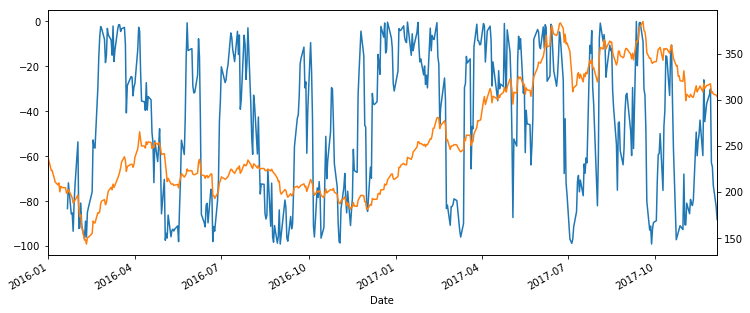

In [18]:
talib.abstract.WILLR(df).plot(figsize=(12,5))
df['close'].plot(secondary_y=True)

In [19]:
#Q5
# 計算 MaxDD
def DrawDownAnalysis(cumRet):
    dd_series = ffn.core.to_drawdown_series(cumRet)
    dd_details = ffn.core.drawdown_details(dd_series)
    return dd_details['drawdown'].min(), dd_details['days'].max()

In [20]:
# 利用策略產生的持有部位資訊，計算底下四個指標來判斷投資績效
# sharpe ratio: 判斷報酬的好壞跟穩定度，數值越大越好
# maxdd: maximum drawdown, 最糟糕的狀況會賠幾 %
# maxddd: maximum drawdown duration, 低於上一次最高報酬的天數
# cumRet[-1]: 最後賺的 % 數

def indicators(df):
    dailyRet = df['close'].pct_change()
    excessRet = (dailyRet - 0.04/252)[df['positions'] == 1]
    SharpeRatio = np.sqrt(252.0)*np.mean(excessRet)/np.std(excessRet)
    
    cumRet = np.cumprod(1+excessRet)
    
    maxdd, maxddd = DrawDownAnalysis(cumRet)
    
    return SharpeRatio, maxdd, maxddd, cumRet[-1]

In [21]:
# 這是我們的策略的部分
# 主要只是要算出進出的訊號 signals 跟何時持有部位 positions
# 底下是一個突破系統的範例

def Breakout_strategy(df):
    # Donchian Channel
    df['20d_high'] = np.round(pd.Series.rolling(df['close'], window=20).max(), 2)
    df['10d_low'] = np.round(pd.Series.rolling(df['close'], window=10).min(), 2)

    has_position = False
    df['signals'] = 0
    for t in range(2, df['signals'].size):
        if df['close'][t] > df['20d_high'][t-1]:
            if not has_position:
                df.loc[df.index[t], 'signals'] = 1
                has_position = True
        elif df['close'][t] < df['10d_low'][t-1]:
            if has_position:
                df.loc[df.index[t], 'signals'] = -1
                has_position = False

    df['positions'] = df['signals'].cumsum().shift()
    return df

In [22]:
def RSI_7030_strategy(df):
    df['RSI'] = talib.RSI(df['close'].values)
    
    has_position = False
    df['signals'] = 0
    for t in range(2, df['signals'].size):
        if df['RSI'][t-1] < 30:
            if not has_position:
                df.loc[df.index[t], 'signals'] = 1
                has_position = True
        elif df['RSI'][t-1] > 70:
            if has_position:
                df.loc[df.index[t], 'signals'] = -1
                has_position = False

    df['positions'] = df['signals'].cumsum().shift()
    return df

In [23]:
def BBands_strategy(df):
    df['UBB'], df['MBB'], df['LBB'] = talib.BBANDS(df['close'].values, matype=MA_Type.T3)

    has_position = False
    df['signals'] = 0
    for t in range(2, df['signals'].size):
        if df['close'][t] < df['LBB'][t-1]:
            if not has_position:
                df.loc[df.index[t], 'signals'] = 1
                has_position = True
        elif df['close'][t] > df['UBB'][t-1]:
            if has_position:
                df.loc[df.index[t], 'signals'] = -1
                has_position = False

    df['positions'] = df['signals'].cumsum().shift()
    return df

In [24]:
# 定義你的策略
def M064030016_strategy(df):
    df['WILLR'] = talib.abstract.WILLR(df)
    
    has_position = False
    df['signals'] = 0
    for t in range(2, df['signals'].size):
        if df['WILLR'][t] < 15:  
            if not has_position:
                df.loc[df.index[t], 'signals'] = 1
                has_position = True
        elif df['WILLR'][t-1] > 85:
            if has_position:
                df.loc[df.index[t], 'signals'] = -1
                has_position = False

    df['positions'] = df['signals'].cumsum().shift()
    return df

In [25]:
def apply_strategy(strategy, df):
    return strategy(df)

In [26]:
# 計算各支股票的回測結果
results = []

#strategies = [Breakout_strategy, RSI_7030_strategy, BBands_strategy, 學號_strategy]
strategies = [Breakout_strategy, RSI_7030_strategy, BBands_strategy, M064030016_strategy]

for symbol in data:
    for strategy in strategies:
        try:
            apply_strategy(strategy, data[symbol])
            if np.all(data[symbol]['signals']==0):
                print("Symbol:", symbol, "使用", strategy.__name__, "策略沒有出現買賣訊號。")
                continue
            SharpeRatio, maxdd, maxddd, finalRet = indicators(data[symbol])
            days = (data[symbol].index[-1] - data[symbol].index[0]).days
            results.append((SharpeRatio, maxdd, maxddd, finalRet, days,
                            data[symbol][data[symbol]['signals'] > 0]['signals'].sum(), symbol, strategy.__name__))
        except Exception as e:
            print("Error occurs at symbol:", symbol, "Strategy:", strategy.__name__, "==>", e.args)

In [27]:
results_df = pd.DataFrame(results, columns=['sharpe','MaxDrawDown','MaxDrawDownDuration','returns', 
                                            'days', 'entries','symbol','strategy'])

In [28]:
results_df.head()

,sharpe,MaxDrawDown,MaxDrawDownDuration,returns,days,entries,symbol,strategy
0,0.131503,-0.208296,281,0.995734,705,11,TICC,Breakout_strategy
1,0.395515,-0.244817,482,1.077756,705,2,TICC,RSI_7030_strategy
2,0.102787,-0.231763,426,0.984521,705,20,TICC,BBands_strategy
3,0.560144,-0.357342,281,1.249056,705,1,TICC,M064030016_strategy
4,1.365570,-0.361485,299,1.631388,705,12,TWIN,Breakout_strategy


In [29]:
results_df.sort_values('MaxDrawDown',ascending=False).head()

,sharpe,MaxDrawDown,MaxDrawDownDuration,returns,days,entries,symbol,strategy
73,6.306176,-0.003654,122,1.028222,473,3,LCA,RSI_7030_strategy
17,10.243474,-0.006251,3,1.132402,705,1,GOOG,RSI_7030_strategy
74,2.038551,-0.013673,119,1.060527,473,16,LCA,BBands_strategy
66,1.085572,-0.023454,135,1.049505,384,12,SCAC,BBands_strategy
36,3.040178,-0.023844,58,1.073352,203,3,CSML,Breakout_strategy


In [30]:
results_df.sort_values('returns',ascending=False).head()

,sharpe,MaxDrawDown,MaxDrawDownDuration,returns,days,entries,symbol,strategy
27,2.226138,-0.157591,88,3.435557,705,1,RICK,M064030016_strategy
79,1.299550,-0.493953,223,3.149385,705,1,BBGI,M064030016_strategy
7,1.247968,-0.355341,205,2.486919,705,1,TWIN,M064030016_strategy
9,2.013777,-0.219296,167,2.477803,705,4,AMOT,RSI_7030_strategy
14,2.062962,-0.286661,113,2.422460,705,22,CDZI,BBands_strategy
